In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv ('advertising.csv')
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


This data is an Advertisement dataset to monitor users who clicked on the ad and users who did not.

In this dataset, we have record for a total of 1000-users holding the users:
    
    1. Daily time spent on site
    2. Age
    3. Area Income
    4. Daily internet usage
    5. Ad topic line
    6. City
    7. Gender
    8. Timestamp
    9. Whether or not User clicked on the Ad.
    
    We would be determining factor(s) that determines whether a user will click on the Ad or not

In [4]:
data.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,2016-03-27 00:53:11,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


We have a total data of 1,000 users captured in the dataset, we can be sure that by the time we are done Cleaning the data the remaining data would have dropped through:

1. Dropping Null values if any exists,
2. Removing Outliers from each columns
3. Adusting/improving on data not Normally distributed.

<AxesSubplot:>

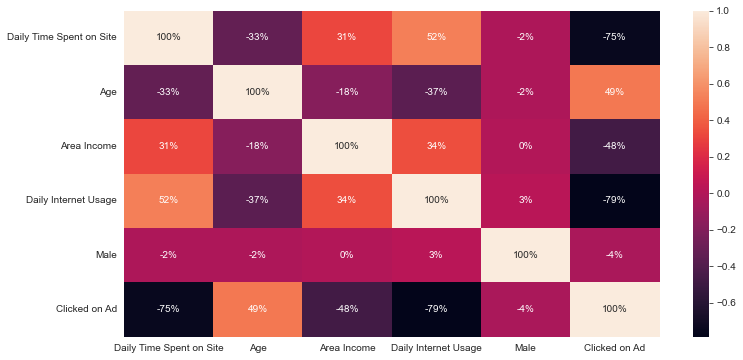

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap (data.corr(),annot=True, fmt='.0%')

From this heatmap, one very strong factor to clicking on the Ad is Age.

This implies that Age is a strong determinig factor to either click the Ad or not

In [6]:
data.groupby(['Daily Time Spent on Site','Daily Internet Usage']).mean().sort_values(['Clicked on Ad'], ascending=True)

Age  Area Income  Male  \
Daily Time Spent on Site Daily Internet Usage                            
68.18                    218.17                21.0     48376.14   1.0   
75.71                    246.06                34.0     62109.80   0.0   
75.74                    215.25                25.0     61005.87   1.0   
75.80                    146.19                38.0     70575.60   1.0   
                         224.90                36.0     71222.40   0.0   
...                                             ...          ...   ...   
56.39                    154.23                58.0     32252.38   0.0   
56.46                    151.63                26.0     66187.58   0.0   
56.57                    131.98                26.0     56435.60   0.0   
55.92                    145.08                24.0     33951.63   0.0   
32.60                    185.47                45.0     48206.04   0.0   

                                               Clicked on Ad  
Daily Time Spent on Site Daily Internet Usage                 
68.18                    218.17                          0.0  
75.71                    246.06                          0.0  
75.74                    215.25                          0.0  
75.80                    146.19                          0.0  
                         224.90                          0.0  
...                                                      ...  
56.39                    154.23                          1.0  
56.46                    151.63                          1.0  
56.57                    131.98                          1.0  
55.92                    145.08                          1.0  
32.60                    185.47                          1.0  

[1000 rows x 4 columns]

Checking for outlier in each Numerical columns and ensuring the columns are Normally Distributed

In [7]:
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


Visualizing the numerical columns to ascertain if they are Normally distributed and to be sure we do not have outlier values in each column.

The models work better when the numerical columns are:
-Normally distributed
-No outlier values

Checking to see if the "Daily Time Spent on Site" Column is normally distributed and to ensure there is no outlier on this column

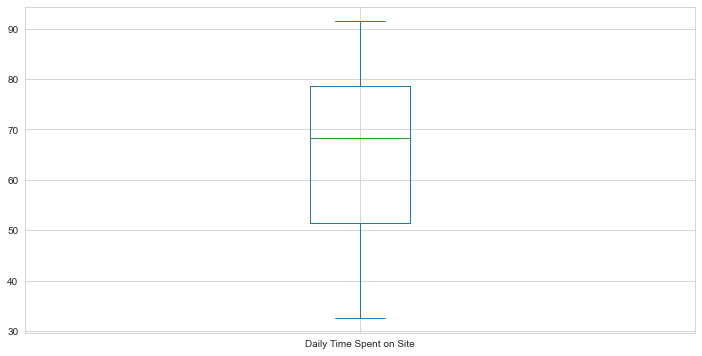

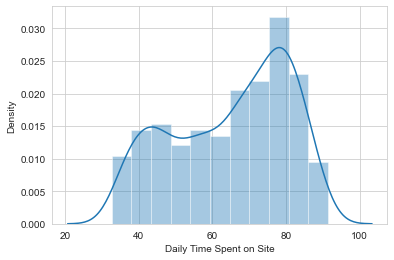

In [8]:
data['Daily Time Spent on Site'].plot.box(figsize=(12,6))
plt.show()
sns.distplot(data['Daily Time Spent on Site'])
plt.show()

From the box plot, it is clear that there are no outliers in the "Daily Time Spent on Site" 
and 
Our Daily time spent on site column is normally distributed..

Checking to see if the Age column is normally distributed and to be sure that there are no outliers in the column

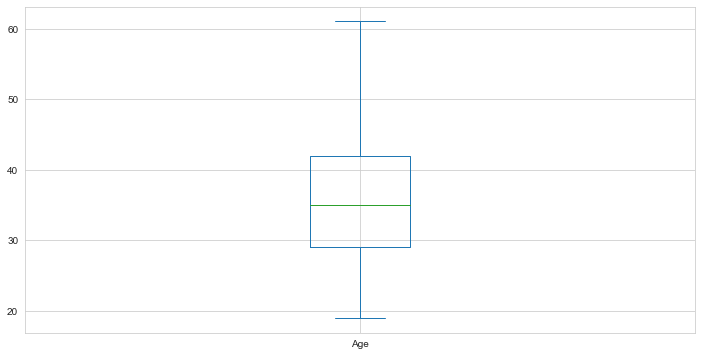

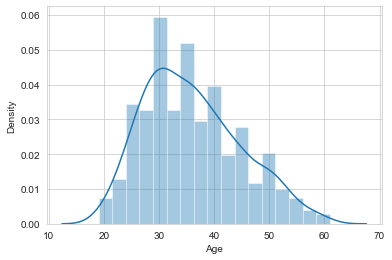

In [9]:
data['Age'].plot.box(figsize=(12,6))
plt.show()
sns.distplot (data['Age'])
plt.show()

From the box plot it is clear that the Age column does not have any outlier
and 
The Age colummn is is also normally distributed

Checking to see if the Area Income column is normally distributed and to be sure that there are no outliers in the column.

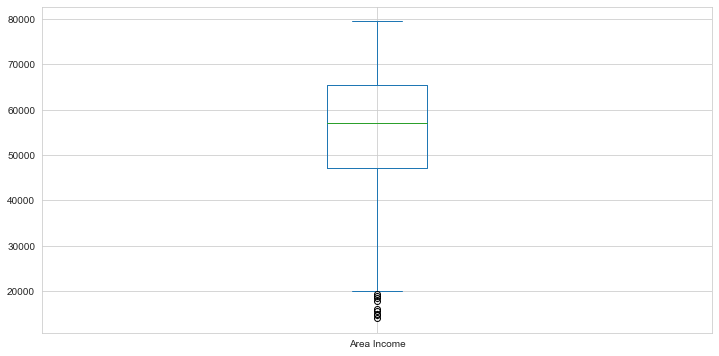

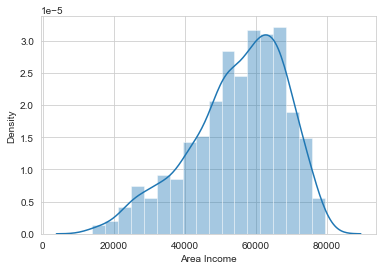

In [10]:
data['Area Income'].plot.box(figsize=(12,6))
plt.show()
sns.distplot (data['Area Income'])
plt.show()

It is clear that the Area Income column has some outliers in the lower part of the income line,
and 
The Area Income to a large extent can be said to be Normally distributed.

We would be dealing with the Outliers in later session as the model works better when there are no outliers in our data.

Checking to see if the Daily Internet usage column is normally distributed and to be sure that there are no outliers in the columns

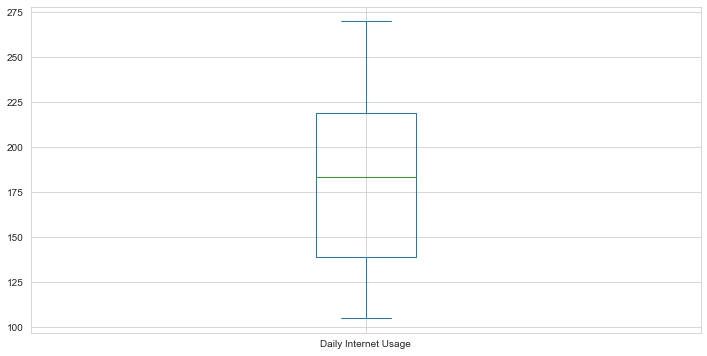

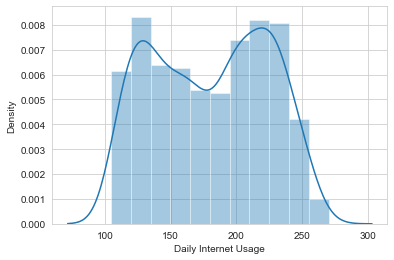

In [11]:
data['Daily Internet Usage'].plot.box(figsize=(12,6))
plt.show()
sns.distplot (data['Daily Internet Usage'])
plt.show()

In [12]:
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


--HYPOTHESIS:
-The total time spent on site is most likely a criteria for a client to either click on Ad.

-The Age range determines wether a visitor would either click the Ad or not based on Ad.
This means that a client would click on certain Ad based on how it appeals to them by their Age range.

-The Area Income of the site visitor is a determinant of the kind/type of Ad the click on.
Site visitors who earn more are most likely to click on the Ads that appeal to them based on the Income status.

-The Daily Internet usage of a visitor would impact wether they would click an Ad or not.
For instance, a visitor might not necessarily click on an Ad the first time but by the time the Ad appears like twice, the visitor is more likely to click the Ad to find out more details regarding the Ad.

This could aslo be seen from a different perspective, if the Ad is brought too frequently, the visitor might not be interested in the Ad because of its frequent appearnce/occurrence.

-The gender can also impart the kind of Ad a visitor clicks on.
An Ad targetted at the female gender is more likely to be engaged by the female gender and vice versa.

In [13]:
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


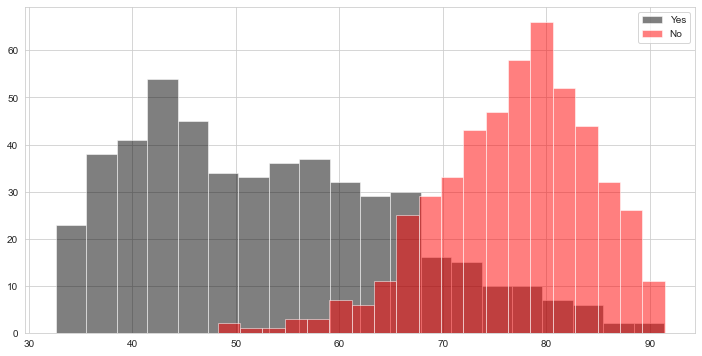

In [14]:
plt.figure(figsize=(12,6))
data[data['Clicked on Ad']==1]['Daily Time Spent on Site'].hist(color='black', bins=20, alpha=0.5, label='Yes')
data[data['Clicked on Ad']==0]['Daily Time Spent on Site'].hist(color='Red', bins=20, alpha=0.5, label='No')
plt.legend()
plt.show()

From our visualization, it can be inferred that the majority of the visitors who clicked on the Ad are those who spend between 32.6-68.5 seconds.

This implies that our major target ranges from visitors who spent around 1-minute on the site.

This means, a very good time to introduce our Ad is within the first minutes on the site.

In [15]:
# data[data['Clicked on Ad']==1]['Daily Time Spent on Site'].max()

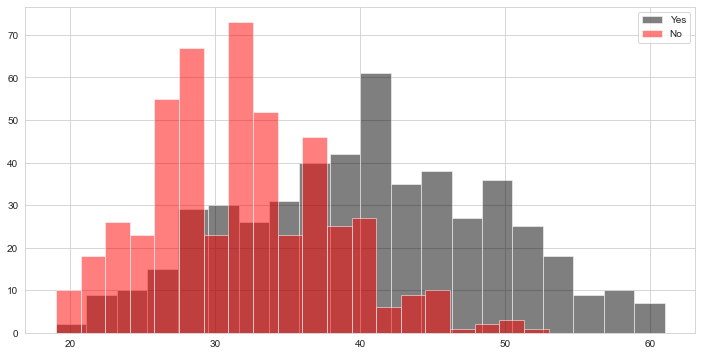

In [16]:
plt.figure(figsize=(12,6))
data[data['Clicked on Ad']==1]['Age'].hist(color='black', bins=20, alpha=0.5, label='Yes')
data[data['Clicked on Ad']==0]['Age'].hist(color='Red', bins=20, alpha=0.5, label='No')
plt.legend()
plt.show()

From our visualization, it can be inferred that the majority of the visitors who clicked on the Ad are from in their mid-30's and above.

This implies that these set of people are our major/target visitors.

We can increase our audience by introducing Ads that would catch the attention of those in lower Age range and by still giving more attention to our major targets.

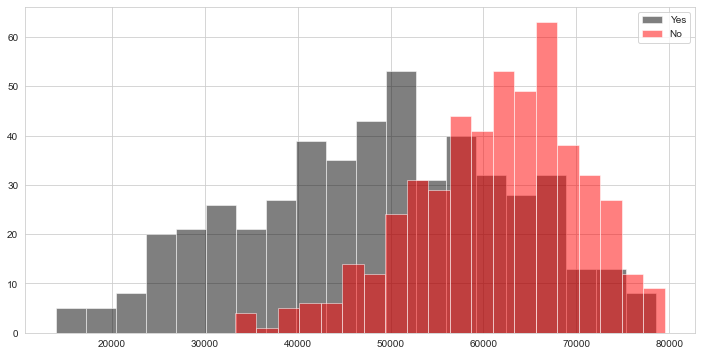

In [17]:
plt.figure(figsize=(12,6))
data[data['Clicked on Ad']==1]['Area Income'].hist(color='black', bins=20, alpha=0.5, label='Yes')
data[data['Clicked on Ad']==0]['Area Income'].hist(color='Red', bins=20, alpha=0.5, label='No')
plt.legend()
plt.show()

From the visualization, we can infer that the Area Income of those who are sure to click the Ad is from the Lower to the medium Income earners.

As opposed to our hypothesis where we assumed that the High earners are more likely to click the Ad.

We can observe that we have some high earners clicking the Ad but we have majority of our Ad clickers between the Low and Medium earners

In [18]:
# plt.figure(figsize=(12,6))
# data[data['Male']==0]['Daily Time Spent on Site'].hist(color='red', alpha=0.75, bins=20)
# data[data['Male']==1]['Daily Time Spent on Site'].hist(color='blue', alpha=0.75, bins=20)

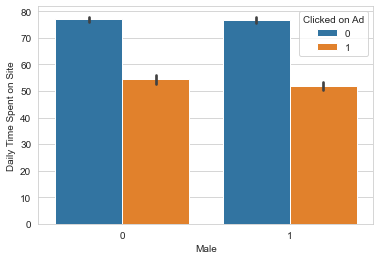

In [19]:
sns.barplot (x=data['Male'],y=data['Daily Time Spent on Site'], hue=data['Clicked on Ad'])
plt.show()
# sns.countplot(x=data['Clicked on Ad'], hue=data['Male'])
# plt.show()

Cheching the dataset to confirm if there are missing values and dealing with the missing values if they exist

In [20]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no missing values in the dataset

Removing Outlier from the numerical column as the presence of outlier(s) can impact the performance of our model

In [21]:
data.drop ((data[data['Area Income']<20000]).index, inplace=True)

In [22]:
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [23]:
print ('Unique Number of Ad Topic = ', data['Ad Topic Line'].nunique())
print ('Unique Number of City = ',data['City'].nunique())
print ('Unique Number of Country = ',data['Country'].nunique())

Unique Number of Ad Topic =  990
Unique Number of City =  959
Unique Number of Country =  237


I would be dropping the "Ad Topi Line", "City" and "Timestamp" Column due to their number of unique value present in each column

In [24]:
data1 = data.drop (['Ad Topic Line', 'City','Timestamp','Country'], axis=1)

Model Building

In [25]:
# data2 = pd.get_dummies (data1['Country'])

In [26]:
# data3 = data1.drop(['Country'], axis=1)

In [27]:
data1.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0


In [28]:
# data4 = pd.concat([data2,data3],axis=1)

In [29]:
x = data1.drop(['Clicked on Ad'],axis=1)
y = data1['Clicked on Ad']

In [30]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit (x)
x_scaled = sc_x.transform (x)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size=0.3, random_state=100)

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2',tol=0.0001, C=1.0)
log_reg.fit (x_train, y_train)

LogisticRegression()

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = ({'penalty':['l2'],'C':[1.0,2.0,3.0,4.0,5.0],'tol':[0.0001,0.01,0.1,1,2,5,10]})

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0], 'penalty': ['l2'],
                         'tol': [0.0001, 0.01, 0.1, 1, 2, 5, 10]})

In [34]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1.0, 'penalty': 'l2', 'tol': 2}
0.9726097382963195


In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2',tol=0.0001, C=5.0)
log_reg.fit (x_train, y_train)

LogisticRegression(C=5.0)

In [36]:
y_pred = log_reg.predict (x_test)

In [37]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit (n_splits=5, test_size=0.3, random_state=100)
cross_val_score (estimator=LogisticRegression(), X=x_scaled, y=y, cv=cv)

array([0.95959596, 0.97306397, 0.97306397, 0.96632997, 0.98653199])

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit (x_train, y_train)
forest_pred = forest.predict (x_test)

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = ({'n_estimators':[100, 120, 150, 180, 200,220,250],'criterion':['gini', 'entropy']})

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 120, 150, 180, 200, 220, 250]})

In [40]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'n_estimators': 120}
0.965415493692003


In [41]:
# Implementing our best Parameters
from sklearn.ensemble import RandomForestClassifier
forest_param = RandomForestClassifier(n_estimators=120, criterion='entropy')
forest_param.fit (x_train, y_train)
forest_param_pred = forest_param.predict (x_test)

In [42]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit (n_splits=5, test_size=0.3, random_state=0)
cross_val_score (estimator=RandomForestClassifier(), X=x_scaled, y=y, cv=cv)

array([0.95622896, 0.97306397, 0.94949495, 0.96969697, 0.95286195])

Classification_Report               precision    recall  f1-score   support

           0       0.97      0.95      0.96       153
           1       0.95      0.97      0.96       144

    accuracy                           0.96       297
   macro avg       0.96      0.96      0.96       297
weighted avg       0.96      0.96      0.96       297

Accuracy_Score 0.9595959595959596


<AxesSubplot:>

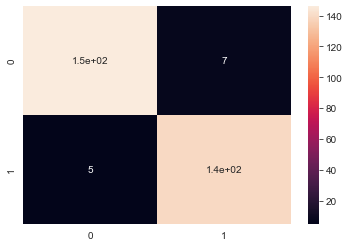

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Classification_Report', classification_report(y_test, forest_pred))

print('Accuracy_Score', accuracy_score(y_test, forest_pred))

conf_mat = confusion_matrix(y_test, forest_pred)
sns.heatmap (conf_mat,annot=True)

<AxesSubplot:>

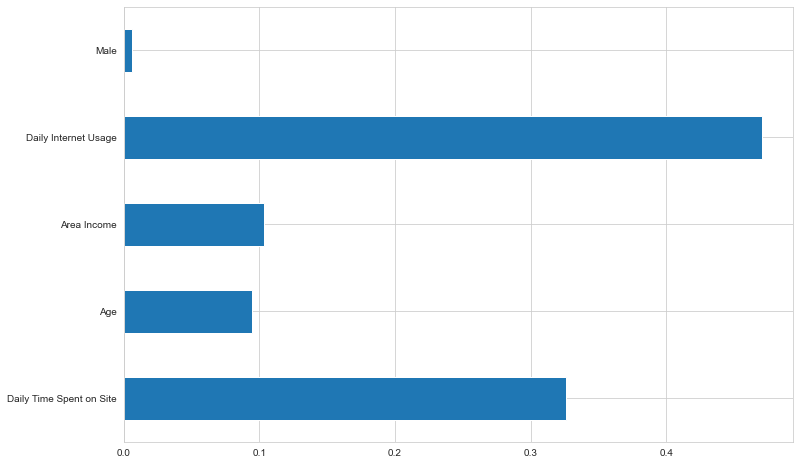

In [45]:
plt.figure(figsize=(12,6))
importances=pd.Series(forest.feature_importances_, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

From our RandomForest Classifier Model, it is evident that the "Daily Internet Usage" and "Daily Time Spent on Site" respectively are major factor that determines if a visitor would click on the Ad or not.

In [58]:
forest.predict([[0.244768,-0.111743,0.499440,1.727402,-0.960380]])
# pd.DataFrame (x_scaled).head(2)
# y.head(2)

array([0], dtype=int64)